In [647]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pyplot import xticks
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [648]:
train = pd.read_csv('input/train.csv')

In [649]:
test = pd.read_csv('input/test.csv')

In [650]:
### EDA

In [651]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [652]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [653]:
# Посмотрим на распределение Price

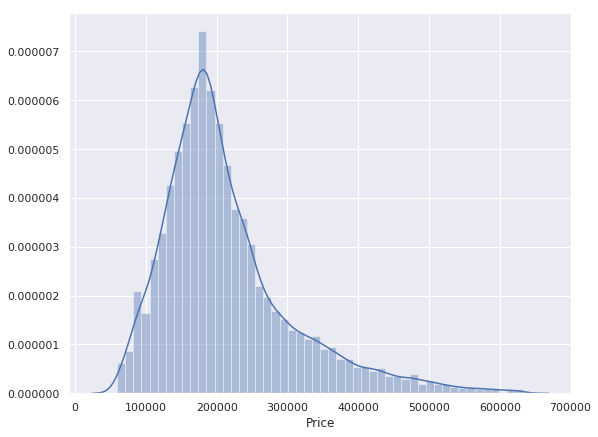

In [654]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train['Price'])
plt.show()

In [655]:
# Посмотрим на значения признаков с типом Int.(Дискретные) До этого преобразуем номера комнат и этажность дома.

In [656]:
train['Rooms']=train['Rooms'].astype('int')

In [657]:
train['HouseFloor']=train['HouseFloor'].astype('int')

In [658]:
ints = train.select_dtypes(include =['int'])

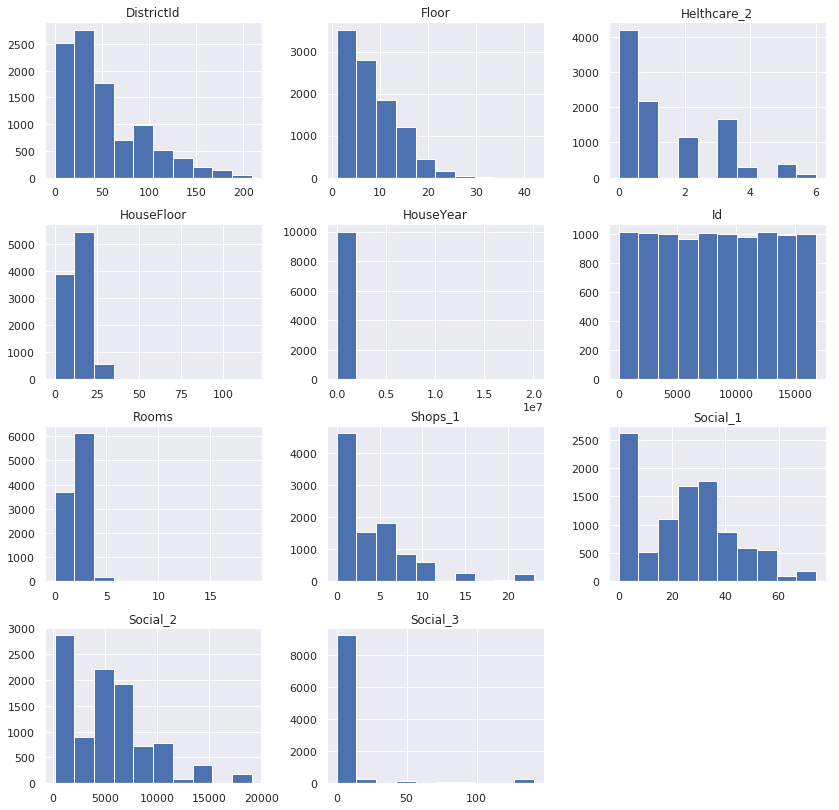

In [659]:
ints.hist(figsize=(14,14))
plt.show()

In [660]:
# В признаках этаж, этаж дома, год дома и количество комнат явно есть выбросы.

In [661]:
# Посмотрим на значение признаков с типом Float64 (Непрерывные величины)

In [662]:
floats = train.select_dtypes(include =['float64'])

In [663]:
floats.columns

Index(['Square', 'LifeSquare', 'KitchenSquare', 'Ecology_1', 'Healthcare_1',
       'Price'],
      dtype='object')

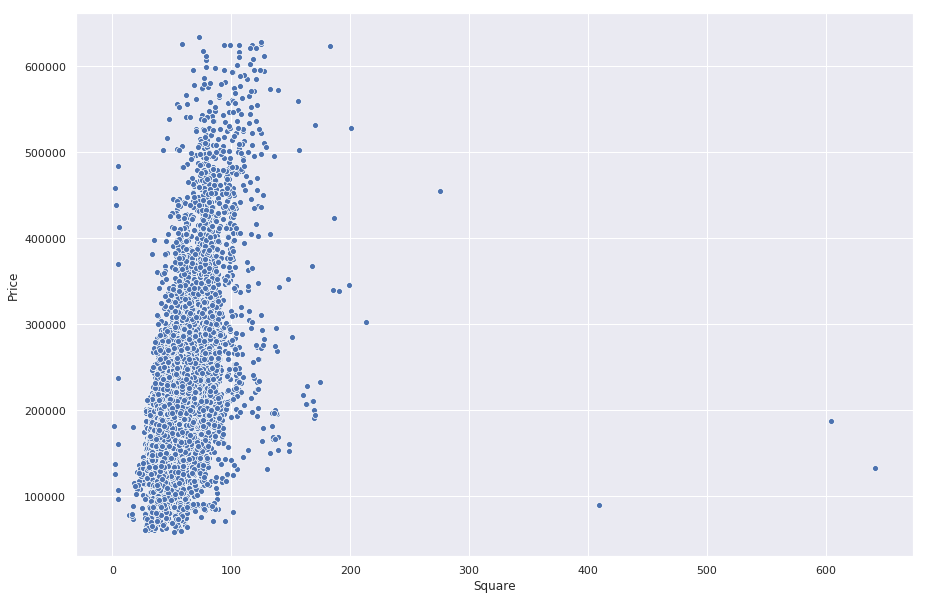

In [664]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='Square', y='Price', legend="full", data= train)
plt.show()

In [665]:
# Явно есть выбросы

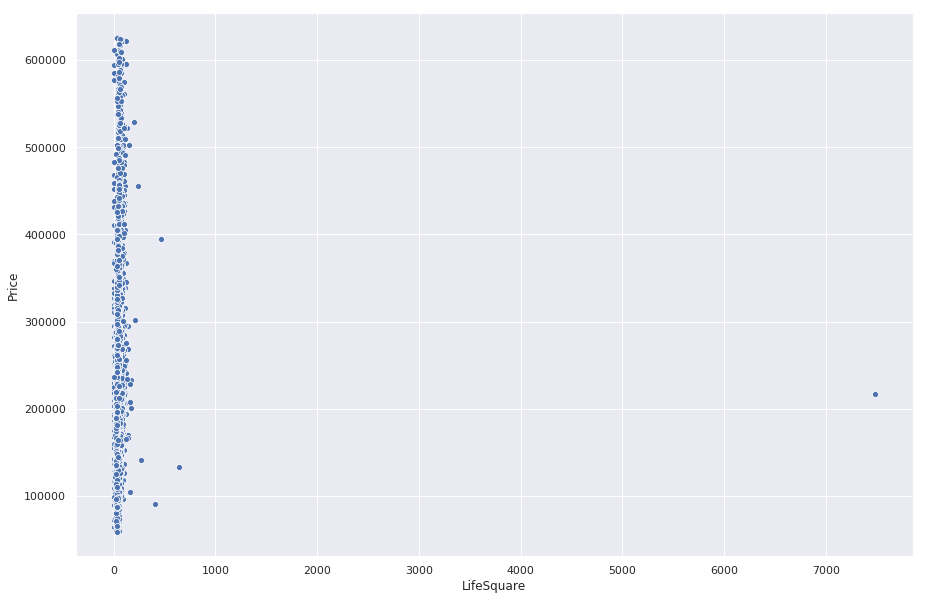

In [666]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='LifeSquare', y='Price', legend="full", data= train)
plt.show()

In [667]:
# Значение более 7000 явно выброс

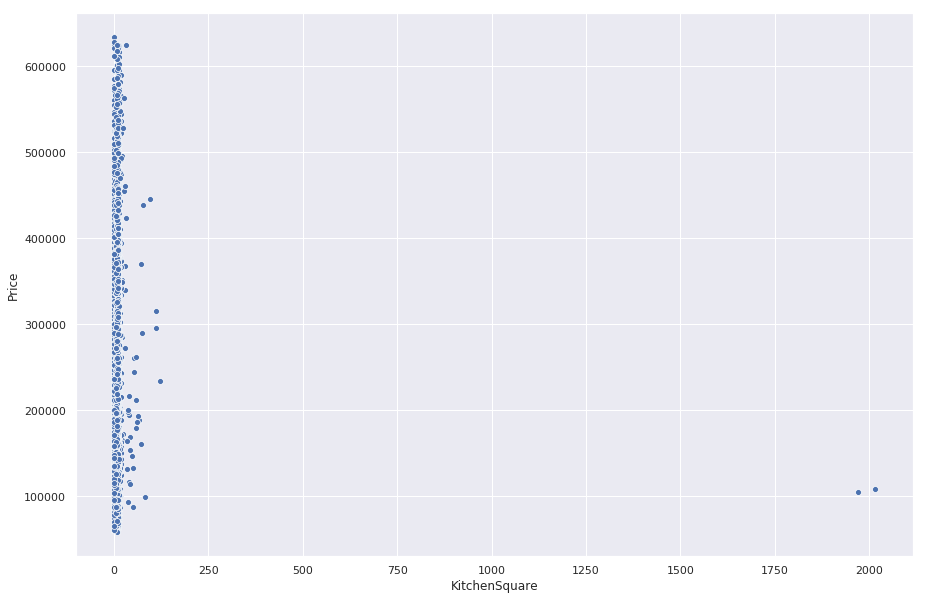

In [668]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='KitchenSquare', y='Price', legend="full", data= train)
plt.show()

In [669]:
# Значения в районе 2000 тоже явно ошибочные

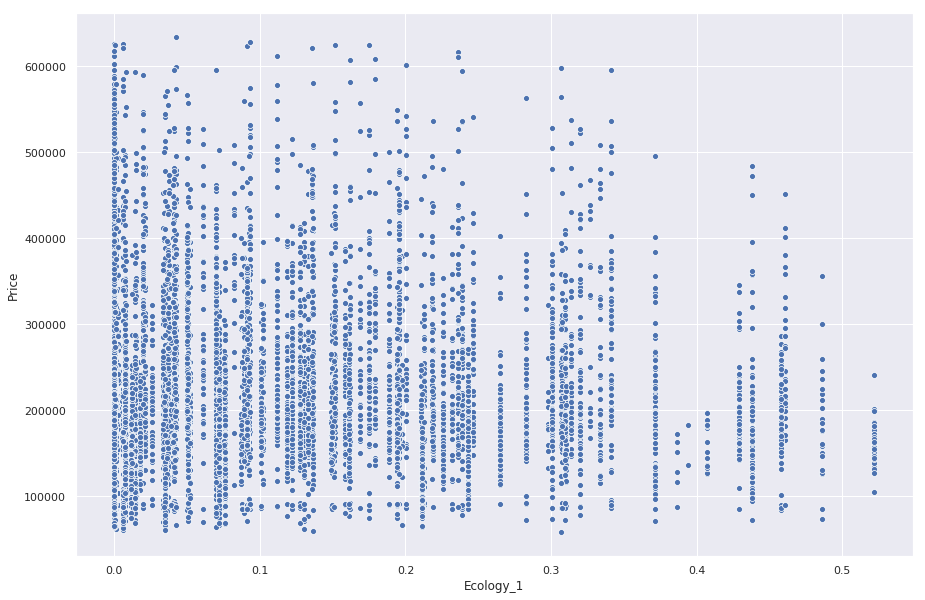

In [670]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='Ecology_1', y='Price', legend="full", data= train)
plt.show()

In [671]:
# Похоже,что данные дискретные 

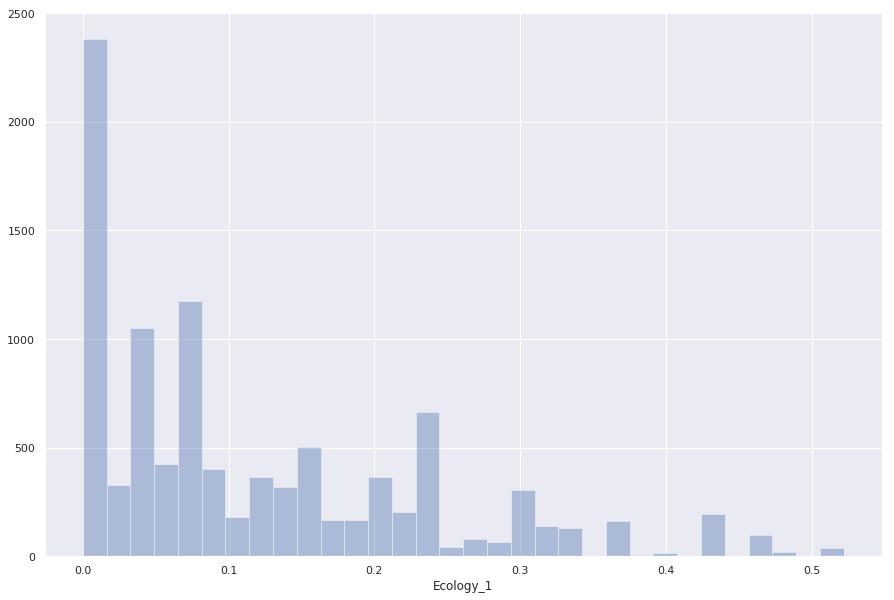

In [672]:
sns.distplot(train['Ecology_1'],kde = False)
plt.show()

In [673]:
# Так и есть. 

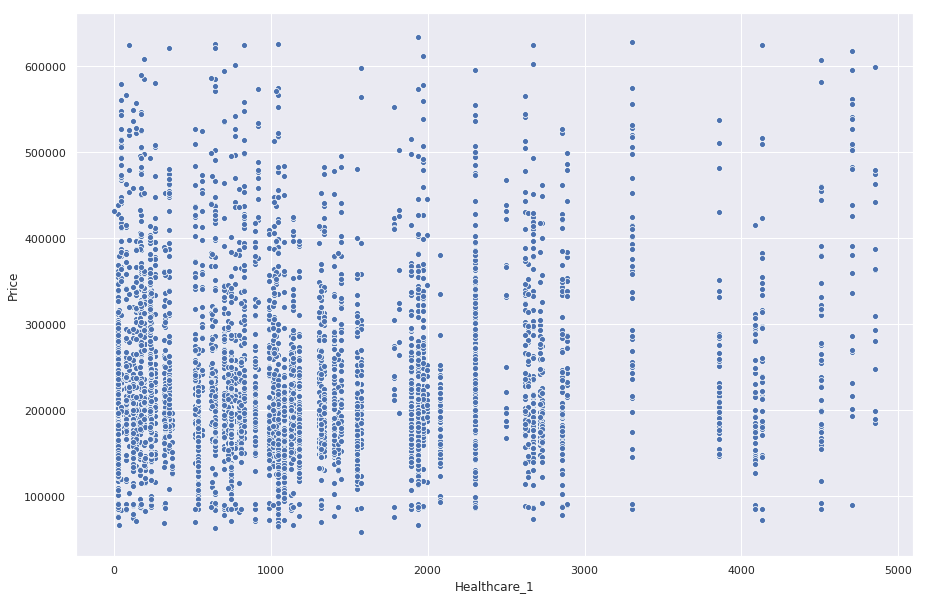

In [674]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='Healthcare_1', y='Price', legend="full", data= train)
plt.show()

In [675]:
# Тоже категории

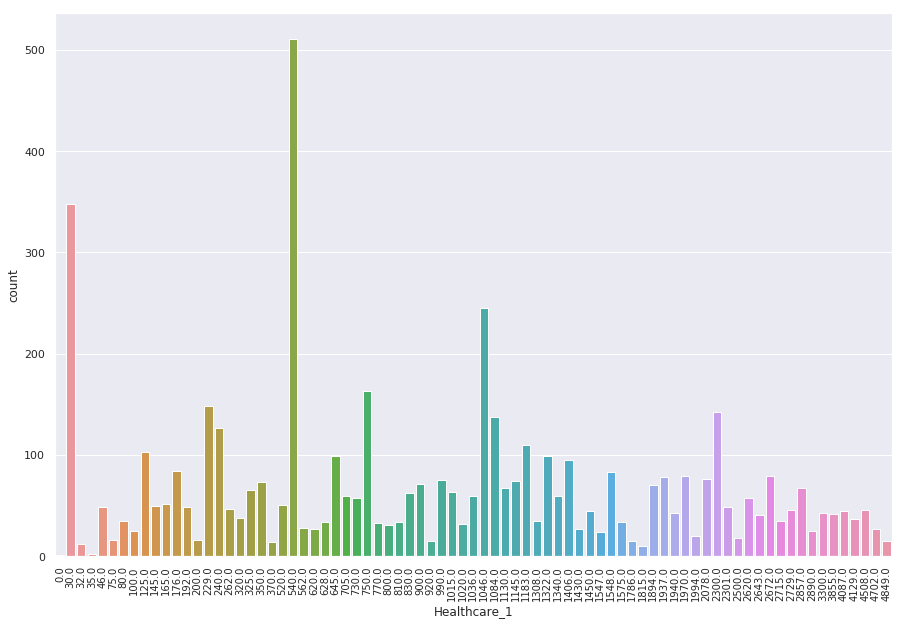

In [676]:
sns.countplot(train['Healthcare_1'])
xticks(fontsize = 10 ,rotation = 90)
plt.show()

In [677]:
### Посмотрим на признаки типа Objects(скорее всего категории с буквенными обозначениями)

In [678]:
objects = train.select_dtypes(include =['object'])

In [679]:
objects.columns

Index(['Ecology_2', 'Ecology_3', 'Shops_2'], dtype='object')

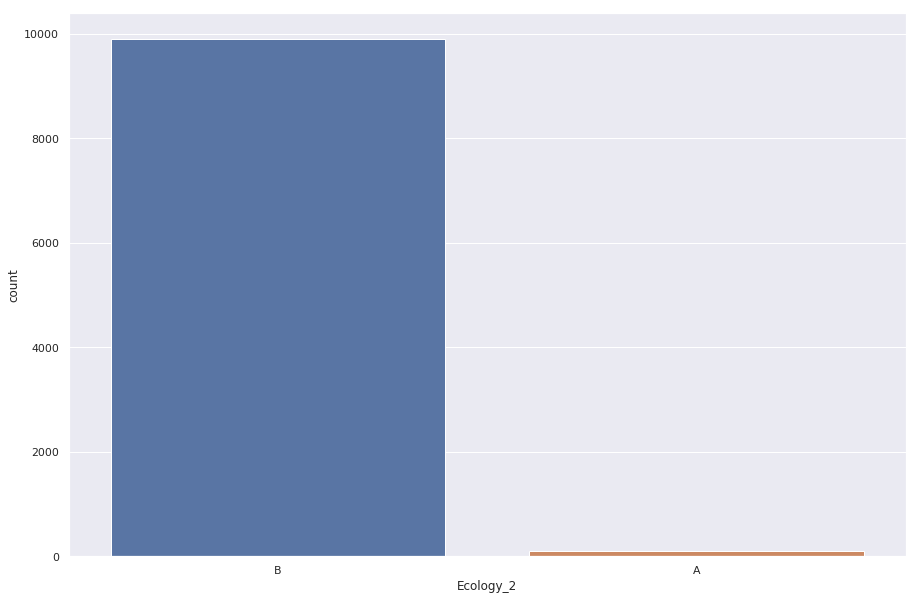

In [680]:
sns.countplot(train['Ecology_2'])
plt.show()

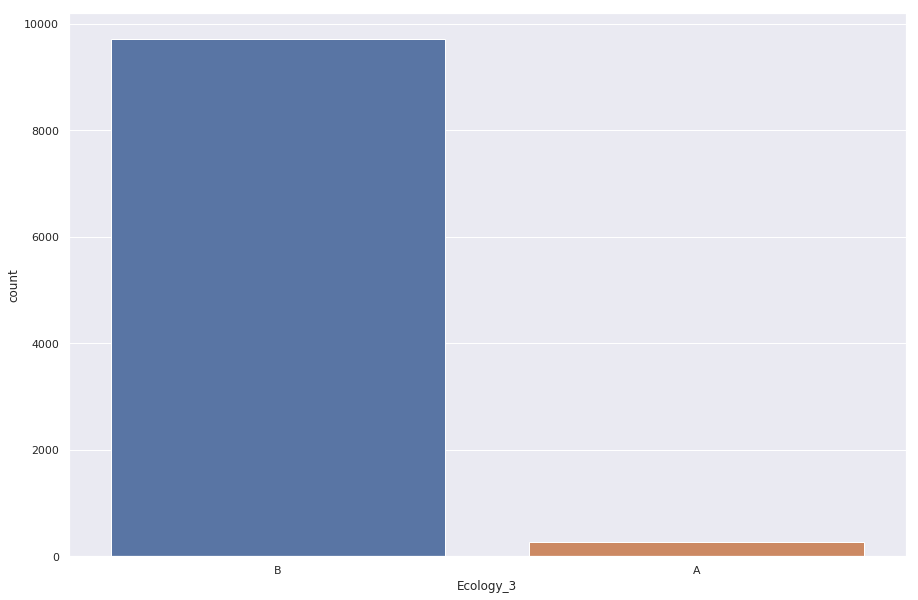

In [681]:
sns.countplot(train['Ecology_3'])
plt.show()

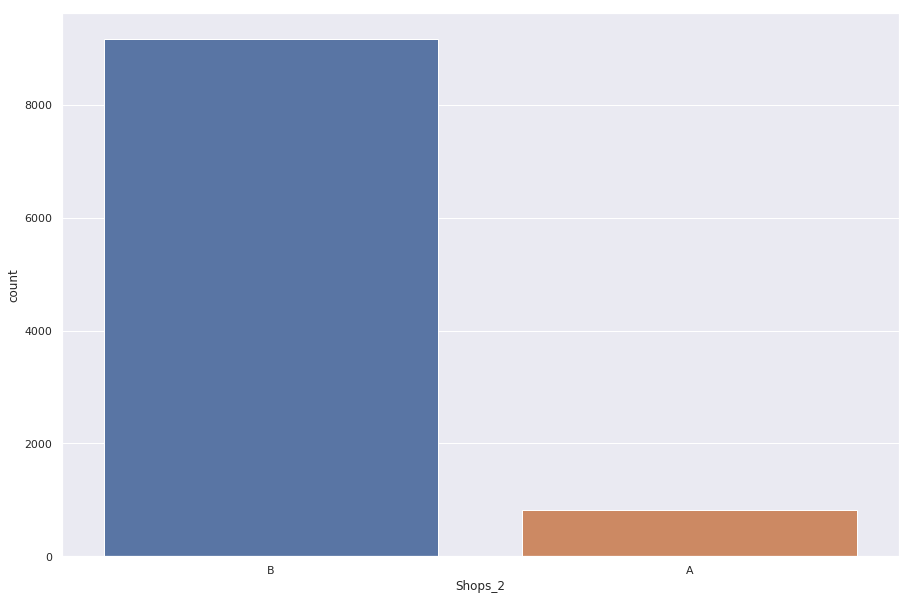

In [682]:
sns.countplot(train['Shops_2'])
plt.show()

In [683]:
# Посмотрим влияние признаков на Price

In [684]:
train_corr = train.corr()

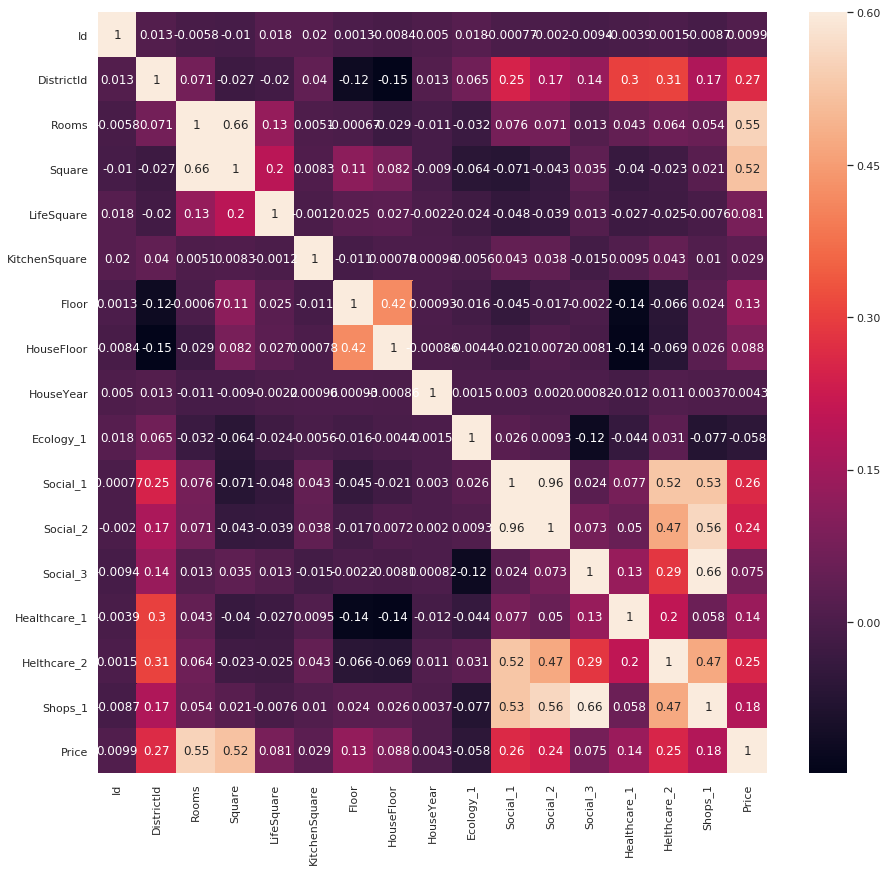

In [685]:
plt.subplots(figsize=(15,14))
sns.heatmap(train_corr,annot = True,vmax=0.6)
plt.show()

In [686]:
train_corr['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.550291
Square           0.520075
DistrictId       0.265100
Social_1         0.263286
Helthcare_2      0.253090
Social_2         0.239226
Shops_1          0.180876
Healthcare_1     0.138755
Floor            0.128715
HouseFloor       0.088280
LifeSquare       0.081292
Social_3         0.074878
KitchenSquare    0.028864
Id               0.009880
HouseYear        0.004305
Ecology_1       -0.058381
Name: Price, dtype: float64

In [687]:
# Data cleaning

In [688]:
def missing_data(data):
    data_na = (data.isnull().sum() / len(data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    return missing_data

In [689]:
missing_data(train)

,Missing Ratio
Healthcare_1,47.98
LifeSquare,21.13


In [690]:
missing_data(test)

,Missing Ratio
Healthcare_1,47.54
LifeSquare,20.82


In [691]:
# Данные остуствуют только в двух признаках,распределение NAN на тесте и на тренировочных данных одинаковое 

In [692]:
# Заполним медианными значениями для Healthcare_1 из трейна и значением Square,деленным на коэфициент.

In [693]:
def filling_na (data):
    data['Healthcare_1'].fillna(train['Healthcare_1'].median(),inplace = True)
    data['LifeSquare'].fillna(data['Square']*\
                          (train['LifeSquare'].median()/train['Square'].median()),inplace = True)

In [694]:
filling_na(train)

In [695]:
filling_na(test)

In [696]:
# Проверим

In [697]:
missing_data(train)

,Missing Ratio


In [698]:
missing_data(test)

,Missing Ratio


In [699]:
# Разберемся с вылетами

In [700]:
def outliers (data):
    
    #Rooms заменим медианами
    data.loc[(data['Rooms'] > 5)&(data['Rooms'] == 0.0)]= train['Rooms'].median()
    
    # Square заменим на lifeSquare или на медиану
    data.loc[(data['Square'] < 15) & (data['LifeSquare'] < 15),'Square'] = train['Square'].median()
    data.loc[(data['Square'] < 15) & (data['LifeSquare'] > 15),'Square'] = data['LifeSquare']
    data.loc[(data['Square'] > 200)&(data['LifeSquare'] > 200),'Square'] = train['Square'].median()
    data.loc[(data['Square'] > 200)&(data['LifeSquare'] < 200),'Square'] = data['LifeSquare']
    
    # LifeSquare заменим на Square,деленным на коэффициент
    data.loc[data['LifeSquare'] < 15,'LifeSquare'] = data['Square']*\
                                                         (train['LifeSquare'].median()/train['Square'].median())
    
    data.loc[data['LifeSquare'] > data['Square'],'LifeSquare'] = data['Square']*\
                                                         (train['LifeSquare'].median()/train['Square'].median())
    
    # KitchenSquare заменим на Square(LifeSquare), деленным на коэффициент
    data.loc[data['KitchenSquare'] < 3,'KitchenSquare']= data['Square']*\
                                                        (train['KitchenSquare'].median()/train['Square'].median())
    
    data.loc[data['KitchenSquare'] > data['LifeSquare'],'KitchenSquare'] = data['LifeSquare']*\
                                                    (train['KitchenSquare'].median()/train['LifeSquare'].median())
    
    # HouseFloor заменим на Floor или на моду
    data.loc[(data['HouseFloor'] < data['Floor']),'HouseFloor'] = data['Floor']
    data.loc[(data['HouseFloor'] > 30)& (data['Floor']> 30),'HouseFloor'] = train['HouseFloor'].median()
    data.loc[(data['HouseFloor'] > 30)& (data['Floor'] < 30),'HouseFloor'] = data['Floor']
    data.loc[(data['HouseFloor'] < 1) & (data['Floor'] < 1),'HouseFloor'] = train['HouseFloor'].median()
    data.loc[(data['HouseFloor'] < 1) & (data['Floor'] > 1),'HouseFloor'] = data['Floor']
    
    # Floor заменим на HouseFloor
    data.loc[(data['Floor'] > 30) | (data['Floor'] < 1),'Floor'] = data['HouseFloor']
    
    # HouseYear заменим на медиану
    data.loc[data['HouseYear'] > 2020,'HouseYear'] = train['HouseYear'].median()

In [701]:
outliers(train)

In [702]:
outliers(test)

In [703]:
# Data Preparation

In [704]:
objects.columns

Index(['Ecology_2', 'Ecology_3', 'Shops_2'], dtype='object')

In [705]:
train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [706]:
train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [707]:
train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [708]:
def category_prep (data):
    for object in objects:
        data[object] = (data[object] == 'A').astype(int)

In [709]:
category_prep(train)

In [710]:
category_prep(test)

In [711]:
# Model

In [712]:
from sklearn.model_selection import train_test_split

In [713]:
X = train.drop(['Id','LifeSquare','Ecology_2', 'Social_2','Price'], axis = 1)

In [714]:
y = train['Price']

In [715]:
X_valid, X_train, y_valid, y_train = train_test_split(X, y,test_size=0.45, random_state=42)

In [716]:
from sklearn.ensemble import RandomForestRegressor

In [717]:
#from sklearn.model_selection import GridSearchCV

In [718]:
#parameters = [{'n_estimators': [100,1000,1500],
          # 'max_features': np.arange(3,6),
         # 'max_depth': np.arange(14, 18)}]

In [719]:
#model = GridSearchCV(estimator=RandomForestRegressor(random_state=100), 
               #param_grid=parameters,
               # scoring='r2',
                #cv=5)

In [720]:
model = RandomForestRegressor(n_estimators = 1500, max_depth = 17, max_features = 3 ,random_state = 100)

In [721]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1500, n_jobs=None, oob_score=False,
           random_state=100, verbose=0, warm_start=False)

In [722]:
#model.best_params_

In [723]:
y_pred = model.predict(X_valid)

In [724]:
y_pred_train = model.predict(X_train)

In [725]:
from sklearn.metrics import r2_score

In [726]:
r2_score(y_valid,y_pred)

0.7343567025427139

In [727]:
r2_score(y_train,y_pred_train)

0.9523985782202864

In [728]:
from sklearn.metrics import mean_absolute_error

In [729]:
mean_absolute_error(y_valid, y_pred)

28478.20081144322

In [730]:
# Prediction

In [731]:
X_test = test.drop(['Id','LifeSquare','Ecology_2', 'Social_2'], axis = 1)

In [732]:
y_test = model.predict(X_test)

In [733]:
test['Price'] = y_test

In [734]:
test.loc[:,['Id','Price']].to_csv('output/APerevezentsev_prediction.csv', index = None)